In [1]:
import plotly.figure_factory as ff

In [2]:
def tasks_extend(tasks: list):
    result = []
    start_time = 0;
    for t in tasks:
        started = max(start_time, t[2])
        finished = started + t[1]
        start_time = finished
        result.append(t + (started, finished))
    return result

def plot_result(input_filename: str, output_filename:str):
    # read instance
    with open(input_filename) as f:
        instance = f.readlines()
    size = int(instance[0])
    tasks = list(map(lambda x: tuple(map(int, x.split(' '))), instance[1:]))
    
    # read result
    with open(output_filename) as f:
        result = f.readlines()
    score = int(result[0])
    results = list(map(lambda x: list(map(int, x.split(' '))), result[1:]))    
    scheduled = [[],[],[],[]]
    
    for i, p in enumerate(results):
        for t in p:
            scheduled[i].append((t,)+tasks[t-1])
            
    # print(scheduled)
    tasks = list(map(tasks_extend, scheduled))
    
    df = [] # tasks to be scheduled
    
    # task schema
    # [0] id # [1] processing # [2] ready # [3] due # [4] started # [5] finished #
    
    for i, task_list in enumerate(tasks):
        for t in task_list:
            # task on time
            if t[5] <= t[3]: # due wieksze od finished, zadanie skończone na czas
                df.append(dict(Task=str(t[0]), Start=t[5], Finish=t[3], Resource='after'))
                df.append(dict(Task=str(t[0]), Start=t[2], Finish=t[4], Resource='should'))
                df.append(dict(Task=str(t[0]), Start=t[4], Finish=t[5], Resource='ontime'))
            elif t[4] < t[3]: # started before deadline, finished after
                df.append(dict(Task=str(t[0]), Start=t[2], Finish=t[4], Resource='should'))
                df.append(dict(Task=str(t[0]), Start=t[4], Finish=t[3], Resource='ontime'))
                df.append(dict(Task=str(t[0]), Start=t[3], Finish=t[5], Resource='late'))
            elif t[4] >= t[3]: # started after deadline
                df.append(dict(Task=str(t[0]), Start=t[2], Finish=t[3], Resource='should'))
                df.append(dict(Task=str(t[0]), Start=t[4], Finish=t[5], Resource='late'))
                
    last = max(list(map(lambda x: int(x['Finish']), df)))
    
    colors = dict(late='rgb(255,0,0)', ontime='rgb(0,255,0)', should='rgb(122,122,122)', after='rgb(141, 188, 254)')
    
    fig = ff.create_gantt(df, colors=colors, index_col='Resource', group_tasks=True, show_colorbar=True, showgrid_x=True)
    fig['layout']['xaxis']['tickformat'] = '%L'
    fig['layout']['xaxis']['tickvals'] = list(range(0, last+1, 10))
    fig['layout']['xaxis']['ticktext'] = list(range(0, last+1, 10))
    fig.layout.xaxis.rangeselector = None
    fig.layout.xaxis.type = 'linear'
    fig.show()


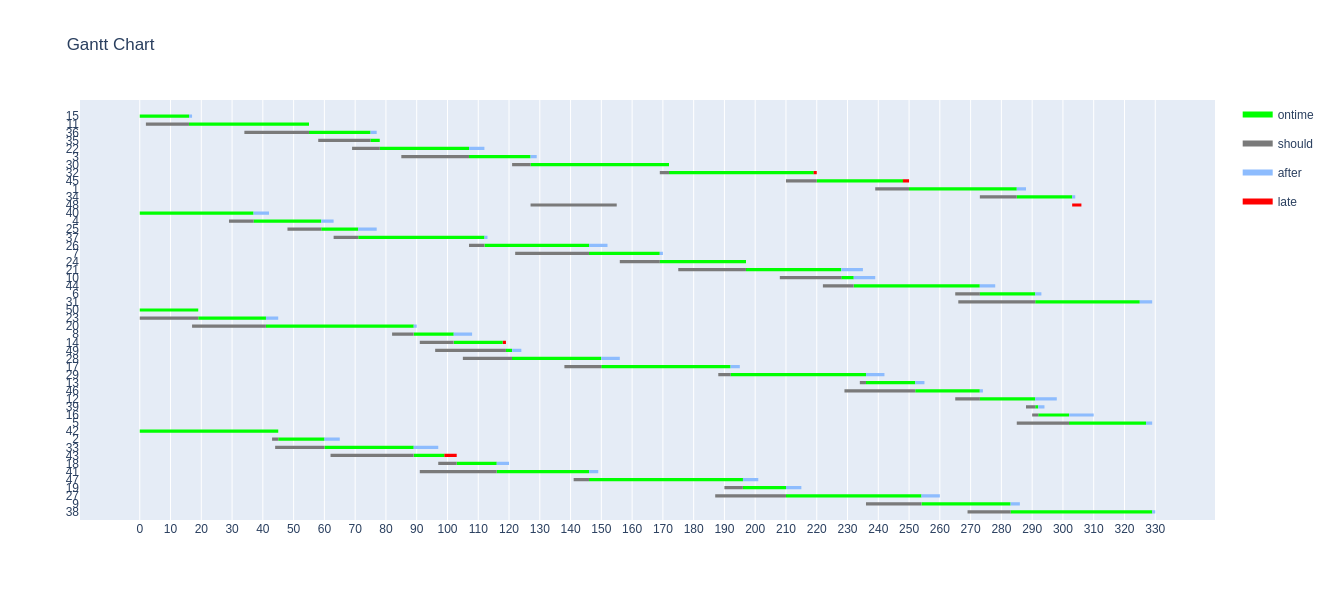

In [28]:
plot_result('./input/mb/n50.txt', './output/mb/z50.txt')

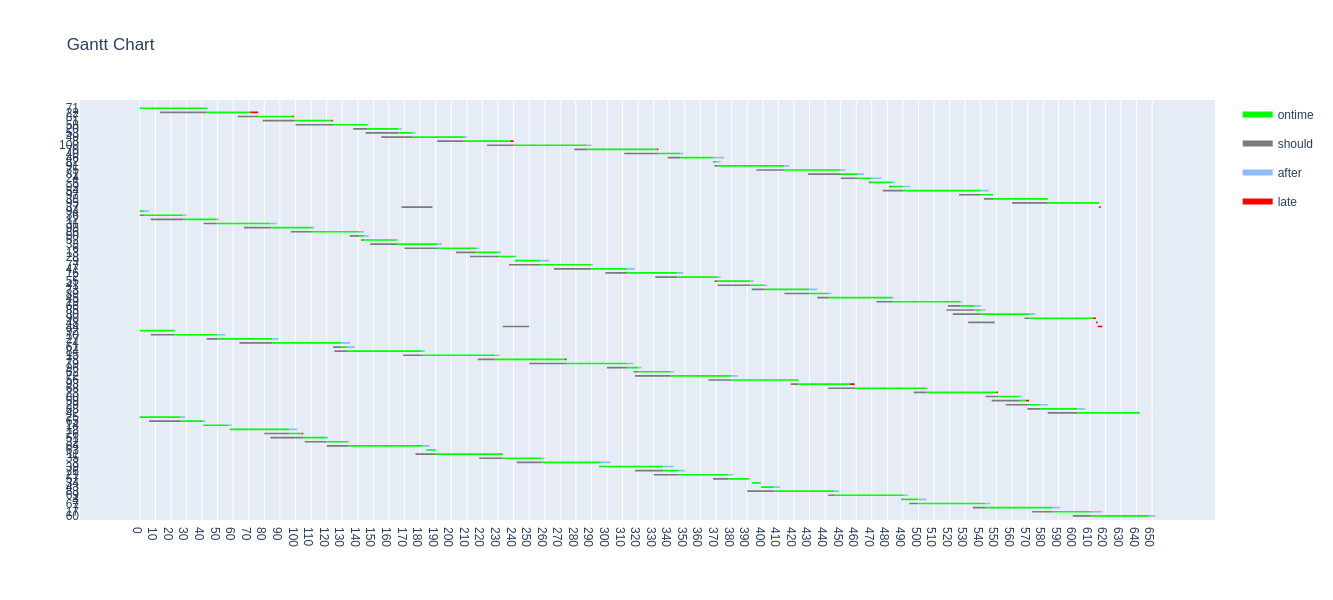

In [27]:
plot_result('./input/mb/n100.txt', './output/mb/z100.txt')

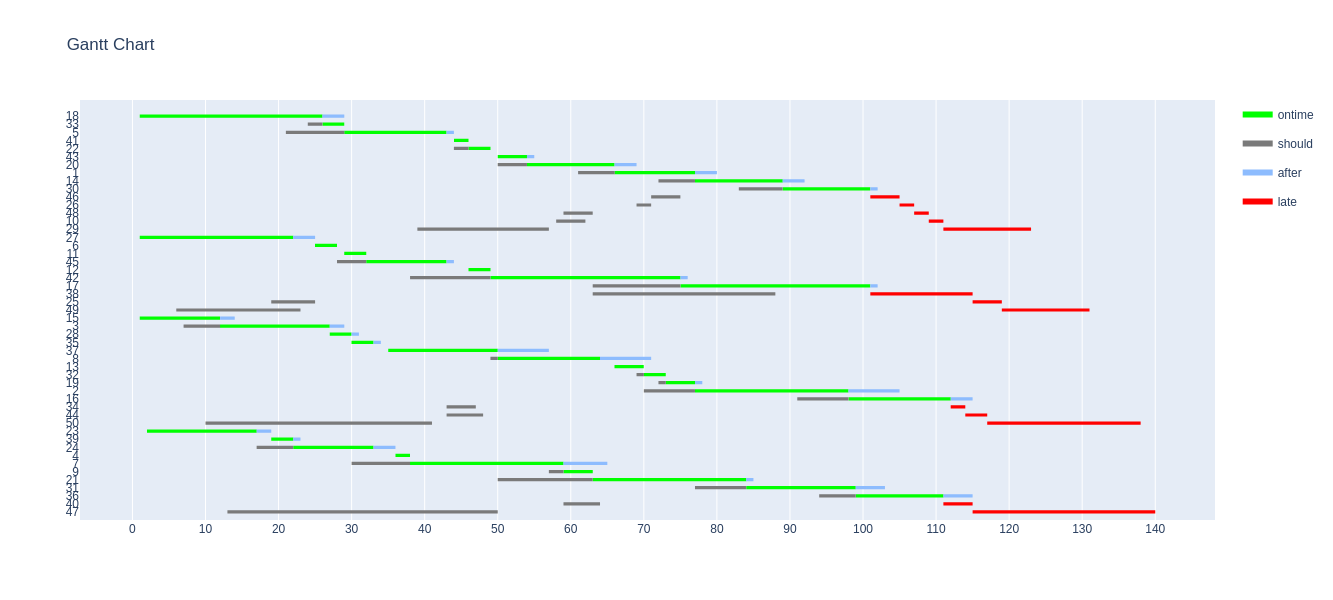

In [31]:
plot_result('./input/wt/n50.txt', './output/wt/z50.txt')